# An Online Computer Store

### Comparative Study
Thanks to the convincing arguments in your pilot-study proposal, the company decides to collect
the data that you suggested and to hire you to perform the proposed study. They provide you with
a training set of historical data made of 1000 examples with 8 features for each email sent in the past
and one label representing whether the receiver bought a product using the corresponding unique
promotion code. These data are organized in the file CE802_Ass_Resit.arff available from the
CE802 moodle page. In this part of the assignment, you are asked to investigate the performance
of a number of machine learning procedures on this dataset using Python/scikit-learn.

You need to perform a comparative study of a number of machine learning procedures:
- a Naive Bayes classifier;
- decision trees;
- at least two more ML technique to predict whether an email led to a sale.

After conducting this study, you are asked to write a report containing an account of your
investigation. There should be a brief summary of the experiments performed followed by one or
more tables summarizing the performance of the different solutions. In particular you should at
least report the accuracy and the Kappa statistics for each prediction algorithm. Any numerical
data that you include should be in a suitable graphical or tabular form. You should not include any
numerical data that is not relevant to your discussion of the relative performances (do not trivially
copy/paste scikit-learn's output). Your report should have an appendix section with the code that
you implemented (for example in the form of a Jupyter notebook).

### Import all the libraries to build the machine learning pipeline

In [616]:
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt
import imblearn
import itertools
from matplotlib import pyplot
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours 
from collections import Counter
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.pipeline import Pipeline

### Import the different evaluation mertics

In [617]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

# Decision Tree classifier
We will build a model using four different classification algorithms which are **decision tree**, **support vector machine**, **random forest** and **naive bayes**. This is the very first machine learning technique we will use to approach the problem and compare the various performance metrics.

### Load the historical dataset of the online computer store.

In [618]:
dt=pd.read_csv("CE802_ASS_2018_RESIT.csv")
dt.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,True
1,3,0.65,15,1.51,9,0.91,1,0.68,True
2,-10,0.21,39,1.67,5,0.10,1,0.58,True
3,-12,1.45,20,-1.54,9,0.70,1,0.27,True
4,13,0.03,41,2.21,9,0.39,1,1.03,False
5,-16,0.64,10,0.61,7,0.91,1,0.39,False
6,8,0.37,16,1.23,10,0.44,1,0.12,True
7,-19,1.53,16,-1.61,2,0.09,1,0.40,False
8,15,1.81,9,-3.04,3,0.42,1,0.39,False
9,0,0.41,12,2.12,14,0.92,1,0.04,False


### Examine the number of rows and columns in the dataset

In [619]:
dt.shape

(1000, 9)

### Explore the dataset and see if there are any missing values.

In [620]:
dt.isnull().sum()

F1    0
F2    0
F3    0
F4    0
F5    0
F6    0
F7    0
F8    0
C     0
dtype: int64

### Split data into attributes and target

In [621]:
X = dt.drop('C', axis=1)
X.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8
0,1,0.73,14,2.49,2,0.89,1,0.60
1,3,0.65,15,1.51,9,0.91,1,0.68
2,-10,0.21,39,1.67,5,0.10,1,0.58
3,-12,1.45,20,-1.54,9,0.70,1,0.27
4,13,0.03,41,2.21,9,0.39,1,1.03
5,-16,0.64,10,0.61,7,0.91,1,0.39
6,8,0.37,16,1.23,10,0.44,1,0.12
7,-19,1.53,16,-1.61,2,0.09,1,0.40
8,15,1.81,9,-3.04,3,0.42,1,0.39
9,0,0.41,12,2.12,14,0.92,1,0.04


### Save the target variable as y

In [622]:
y = dt['C']
y.head(10)

0     True
1     True
2     True
3     True
4    False
5    False
6     True
7    False
8    False
9    False
Name: C, dtype: bool

### Normalize the dataset

In [623]:
scale=StandardScaler()
X= scale.fit_transform(X)
X

array([[ 0.06, -0.44, -0.8 , ...,  1.35,  0.16,  0.39],
       [ 0.24, -0.58, -0.76, ...,  1.42,  0.16,  0.67],
       [-0.9 , -1.37,  0.33, ..., -1.34,  0.16,  0.33],
       ...,
       [-0.9 ,  1.36, -1.26, ...,  0.74,  0.16,  0.43],
       [-1.6 ,  0.63,  1.56, ..., -0.8 ,  0.16, -0.44],
       [ 1.28, -1.14, -0.39, ...,  1.31,  0.16, -1.58]])

### Over-sampling and under-sampling on unbalanced data

0.7.0
Class=0, n=252 (34.054%)
Class=1, n=488 (65.946%)


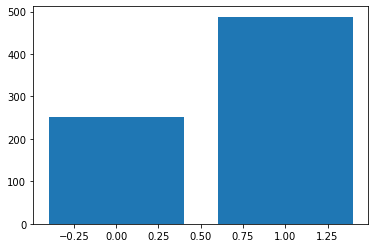

In [624]:
print(imblearn.__version__)

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 80 percent for training and 20 percent for testing.

In [625]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=50)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (592, 8) (592,)
Test set: (148, 8) (148,)


In [626]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_test))]

### To build the model, use the decision tree classifier.

In [627]:
dtclassifier = DecisionTreeClassifier()
dtclassifier

DecisionTreeClassifier()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy.

In [628]:
#pass the parameters for decision tree classifier
param_dict={"criterion":['gini', 'entropy'],
           "max_depth":range(1,12),
           "min_samples_split": range(1,12),
           "min_samples_leaf": range(1,5)}

### This informs us of the best parameter for our model's efficiency.

In [629]:
grid= GridSearchCV(dtclassifier, param_grid=param_dict, cv=10, verbose=1, n_jobs=-1)
grid.fit(x_train, y_train)

Fitting 10 folds for each of 968 candidates, totalling 9680 fits


C:\Users\danla\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:918: UserWarning: One or more of the test scores are non-finite: [ nan 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75  nan 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75  nan 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75  nan 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75  nan 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75  nan
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75  nan 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75  nan 0.75 0.75 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75  nan 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75
 0.75  nan 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75  nan 0.75
 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75 0.75  nan 0.75 0.75 0.75 0.75
 0.75 0.75 0.75 0.75 0.75 0.75  nan 0.72 0.73 0.73 0.73 0.72 0.72 0.72
 0.72 0.72 0.72  nan 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72 0.72
  nan 0.73 0.72 0.73 0.73 0.73 0.72 0.72 0.72 0.72 0.72  nan 0.72 0.72
 0.72

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 12),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 12)},
             verbose=1)

### This will yield the most optimal parameters, estimator and score for our decision tree classifier.

In [630]:
print('Best parameter:',grid.best_params_)
print('Grid best estimator:',grid.best_estimator_)
print('Best score:',grid.best_score_)

Best parameter: {'criterion': 'gini', 'max_depth': 11, 'min_samples_leaf': 3, 'min_samples_split': 3}
Grid best estimator: DecisionTreeClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=3)
Best score: 0.8481638418079097


### Will now, apply the above-mentioned parameters for the decision tree classifier

In [631]:
dtclassifier = DecisionTreeClassifier(criterion= 'gini', max_depth=11,  min_samples_leaf=3, min_samples_split=3)
dtclassifier

DecisionTreeClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=3)

### To train the model, I used the fit function.

In [632]:
dtclassifier.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=11, min_samples_leaf=3, min_samples_split=3)

### A complete way for calculating the ROC curve and ROC AUC for a Decision Tree

In [633]:
# predict probabilities
dt_probs = dtclassifier.predict_proba(x_test)

In [634]:
# keep probabilities for the positive outcome only
dt_probs = dt_probs[:, 1]

In [635]:
# calculate scores
ns_auc = roc_auc_score(y_test, ns_probs)
dt_auc = roc_auc_score(y_test, dt_probs)

In [636]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (dt_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.862


In [637]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs)
dt_fpr, dt_tpr, _ = roc_curve(y_test, dt_probs)

### Plot the ROC curve for the model

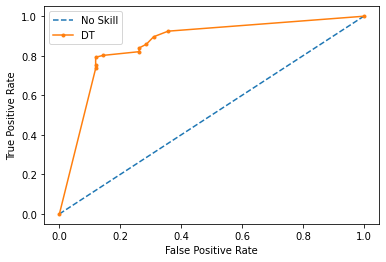

In [638]:
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(dt_fpr, dt_tpr, marker='.', label='DT')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

### Will apply the predict method to the test set.

In [639]:
y_pred = dtclassifier.predict(x_test)

### I used cross validation to further analyse the model's performance on its test set.

In [640]:
print(classification_report(y_test, y_pred))

print('Accuracy of Decision Tree classifier on the training set: {:.2f}'.format(dtclassifier.score(x_train, y_train)))
print('Accuracy of Decision Tree classifier on the test set: {:.2f}'.format(dtclassifier.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(dtclassifier, x_train, y_train, cv=10) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.62      0.74      0.67        42
           1       0.89      0.82      0.85       106

    accuracy                           0.80       148
   macro avg       0.75      0.78      0.76       148
weighted avg       0.81      0.80      0.80       148

Accuracy of Decision Tree classifier on the training set: 0.95
Accuracy of Decision Tree classifier on the test set: 0.80
Cross-validation score:  [0.82 0.77 0.85 0.86 0.86 0.81 0.93 0.83 0.85 0.88]
Cross-validation mean score:  0.8464689265536721


### Summarize the model's performance using different classification metrics.

In [641]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)

summarize_classification(y_test, y_pred)

Length of testing data:  148
accuracy_count :  118
accuracy_score :  0.7972972972972973
f1_score :  0.8021358954862792
precision_score :  0.8117705460562603
recall_score :  0.7972972972972973
jaccard_score :  0.6767890210513161


### In y_pred, save the model's anticipated outcome.

In [642]:
y_pred = dtclassifier.predict(x_test)

### Let's examine how well the model predicts on unseen data.

In [643]:
#Accuracy performance
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
47,1,1
104,1,1
25,1,1
38,0,1
81,1,0
82,1,1
16,0,0
67,1,0
135,0,0
84,1,0


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative.

In [644]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.62      0.74      0.67        42
           1       0.89      0.82      0.85       106

    accuracy                           0.80       148
   macro avg       0.75      0.78      0.76       148
weighted avg       0.81      0.80      0.80       148

Confusion matrix, without normalization
[[31 11]
 [19 87]]


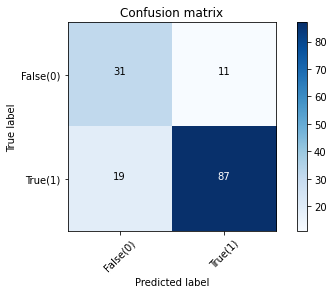

In [645]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False(0)','True(1)'],normalize= False,  title='Confusion matrix')

# Support Vector Machine Learning Technique

### Load the historical dataset of the online computer store.

In [646]:
df_svm=pd.read_csv("CE802_ASS_2018_RESIT.csv")
df_svm.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,True
1,3,0.65,15,1.51,9,0.91,1,0.68,True
2,-10,0.21,39,1.67,5,0.10,1,0.58,True
3,-12,1.45,20,-1.54,9,0.70,1,0.27,True
4,13,0.03,41,2.21,9,0.39,1,1.03,False
5,-16,0.64,10,0.61,7,0.91,1,0.39,False
6,8,0.37,16,1.23,10,0.44,1,0.12,True
7,-19,1.53,16,-1.61,2,0.09,1,0.40,False
8,15,1.81,9,-3.04,3,0.42,1,0.39,False
9,0,0.41,12,2.12,14,0.92,1,0.04,False


### Split data into attributes and target

In [647]:
X = dt.drop('C', axis=1)
y = dt['C']

### Standardize the data

In [648]:
scale=StandardScaler()
X= scale.fit_transform(X)
X

array([[ 0.06, -0.44, -0.8 , ...,  1.35,  0.16,  0.39],
       [ 0.24, -0.58, -0.76, ...,  1.42,  0.16,  0.67],
       [-0.9 , -1.37,  0.33, ..., -1.34,  0.16,  0.33],
       ...,
       [-0.9 ,  1.36, -1.26, ...,  0.74,  0.16,  0.43],
       [-1.6 ,  0.63,  1.56, ..., -0.8 ,  0.16, -0.44],
       [ 1.28, -1.14, -0.39, ...,  1.31,  0.16, -1.58]])

### Over-sampling and under-sampling on unbalanced data

0.7.0
Class=0, n=252 (34.054%)
Class=1, n=488 (65.946%)


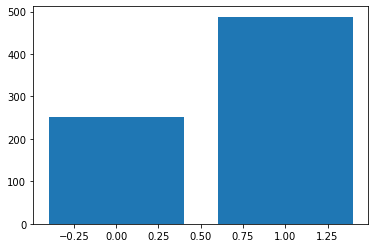

In [649]:
print(imblearn.__version__)



oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 70 percent for training and 30 percent for testing.

In [650]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=50)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (518, 8) (518,)
Test set: (222, 8) (222,)


### To build the model, I use the SVM classifier.

In [651]:
clf = SVC()

### Grid search cross validation hyperparameter tuning will be used to improve our model's performance accuracy.

In [652]:
# defining parameter range
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['rbf']} 
  
grid = GridSearchCV(clf, param_grid, refit = True, verbose = 3)
  
# fitting the model for grid search
grid.fit(x_train, y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.0s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.0s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 4/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 5/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.0s
[CV 1/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

### This will produce the best parameters, estimator, and score for our SVM classifier.

In [653]:
print('Best parameter:',grid.best_params_)
print('Grid best estimator:',grid.best_estimator_)
print('Best score:',grid.best_score_)

Best parameter: {'C': 100, 'gamma': 0.1, 'kernel': 'rbf'}
Grid best estimator: SVC(C=100, gamma=0.1)
Best score: 0.9304144884241972


### Will now, apply the above-mentioned parameters for the SVM classifier

In [654]:
clf = SVC(C=100, gamma=0.1, kernel= 'rbf')
clf.fit(x_train, y_train) 

SVC(C=100, gamma=0.1)

### Will apply the predict method to the test set.

In [655]:
y_pred = clf.predict(x_test)

### I used cross validation to further analyze the model's performance on its test set.

In [656]:
print(classification_report(y_test, y_pred))

print('Accuracy of SVM classifier on the training set: {:.2f}'.format(clf.score(x_train, y_train)))
print('Accuracy of SVM classifier on the test set: {:.2f}'.format(clf.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(clf, x_train, y_train, cv=10) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        66
           1       0.94      0.96      0.95       156

    accuracy                           0.92       222
   macro avg       0.91      0.90      0.91       222
weighted avg       0.92      0.92      0.92       222

Accuracy of SVM classifier on the training set: 1.00
Accuracy of SVM classifier on the test set: 0.92
Cross-validation score:  [0.96 0.9  0.92 0.92 0.92 0.9  0.88 0.92 0.92 0.92]
Cross-validation mean score:  0.9189291101055808


### Summarize the model's performance using different classification metrics.

In [657]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)
    
summarize_classification(y_test, y_pred)

Length of testing data:  222
accuracy_count :  205
accuracy_score :  0.9234234234234234
f1_score :  0.9228976484790439
precision_score :  0.9227718284322057
recall_score :  0.9234234234234234
jaccard_score :  0.8588028530263222


### In y_pred, save the model's anticipated result.

In [658]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
71,1,1
73,1,1
103,0,0
5,1,1
4,0,0
35,1,1
202,1,0
102,1,1
86,1,1
163,1,1


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative.

In [659]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

              precision    recall  f1-score   support

           0       0.89      0.85      0.87        66
           1       0.94      0.96      0.95       156

    accuracy                           0.92       222
   macro avg       0.91      0.90      0.91       222
weighted avg       0.92      0.92      0.92       222

Confusion matrix, without normalization
[[ 56  10]
 [  7 149]]


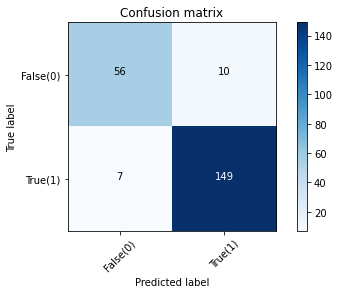

In [660]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[0,1])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['False(0)','True(1)'],normalize= False,  title='Confusion matrix')

# Random Forest Classifier

### Load the historical dataset of the online computer store.

In [661]:
df_rf=pd.read_csv("CE802_ASS_2018_RESIT.csv")
df_rf.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,True
1,3,0.65,15,1.51,9,0.91,1,0.68,True
2,-10,0.21,39,1.67,5,0.10,1,0.58,True
3,-12,1.45,20,-1.54,9,0.70,1,0.27,True
4,13,0.03,41,2.21,9,0.39,1,1.03,False
5,-16,0.64,10,0.61,7,0.91,1,0.39,False
6,8,0.37,16,1.23,10,0.44,1,0.12,True
7,-19,1.53,16,-1.61,2,0.09,1,0.40,False
8,15,1.81,9,-3.04,3,0.42,1,0.39,False
9,0,0.41,12,2.12,14,0.92,1,0.04,False


### Separate the data into features and targets.

In [662]:
X = dt.drop('C', axis=1)
y = dt['C']

### Normalize the data

In [663]:
scale=StandardScaler()
X= scale.fit_transform(X)
X

array([[ 0.06, -0.44, -0.8 , ...,  1.35,  0.16,  0.39],
       [ 0.24, -0.58, -0.76, ...,  1.42,  0.16,  0.67],
       [-0.9 , -1.37,  0.33, ..., -1.34,  0.16,  0.33],
       ...,
       [-0.9 ,  1.36, -1.26, ...,  0.74,  0.16,  0.43],
       [-1.6 ,  0.63,  1.56, ..., -0.8 ,  0.16, -0.44],
       [ 1.28, -1.14, -0.39, ...,  1.31,  0.16, -1.58]])

### Over-sampling and under-sampling on unbalanced data

0.7.0
Class=0, n=252 (34.054%)
Class=1, n=488 (65.946%)


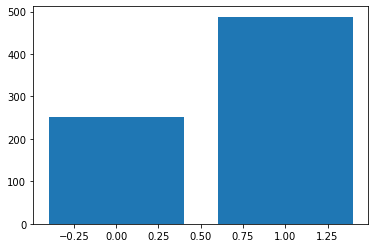

In [664]:
print(imblearn.__version__)

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 70 percent for training and 30 percent for testing.

In [665]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=50)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (518, 8) (518,)
Test set: (222, 8) (222,)


### To build the model, I use the Random Forest classifier.

In [666]:
rf=RandomForestClassifier()
rf

RandomForestClassifier()

### Grid search cross validation hyperparameter tuning will be utilised to increase the performance accuracy of our model.

In [667]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

In [668]:
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 10, n_jobs = -1, verbose = 2)

In [669]:
grid_search.fit(x_train,y_train)

Fitting 10 folds for each of 288 candidates, totalling 2880 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'bootstrap': [True], 'max_depth': [80, 90, 100, 110],
                         'max_features': [2, 3], 'min_samples_leaf': [3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 200, 300, 1000]},
             verbose=2)

### This will produce the best parameters, estimator, and score for our RF classifier.

In [670]:
print('Best parameter:', grid_search.best_params_)
print('Best grid estimator:', grid_search.best_estimator_)
print('Best score', grid_search.best_score_)

Best parameter: {'bootstrap': True, 'max_depth': 110, 'max_features': 3, 'min_samples_leaf': 3, 'min_samples_split': 8, 'n_estimators': 300}
Best grid estimator: RandomForestClassifier(max_depth=110, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)
Best score 0.8398190045248869


### I will now, apply the above-mentioned parameters for the RF classifier

In [671]:
rf=RandomForestClassifier(bootstrap=True, max_depth=100, max_features=3, 
                          min_samples_leaf=3, min_samples_split=8,
                          n_estimators=300).fit(x_train,y_train)
rf

RandomForestClassifier(max_depth=100, max_features=3, min_samples_leaf=3,
                       min_samples_split=8, n_estimators=300)

### I will apply the predict method to the test set.

In [672]:
y_pred = rf.predict(x_test)

### I used cross validation to further analyze the model's performance on its test set.

In [673]:
print(classification_report(y_test, y_pred))

print('Accuracy of Random Forest classifier on the training set: {:.2f}'.format(rf.score(x_train, y_train)))
print('Accuracy of Random Forest classifier on the test set: {:.2f}'.format(rf.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(rf, x_train, y_train, cv=5) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.83      0.61      0.70        66
           1       0.85      0.95      0.90       156

    accuracy                           0.85       222
   macro avg       0.84      0.78      0.80       222
weighted avg       0.85      0.85      0.84       222

Accuracy of Random Forest classifier on the training set: 0.98
Accuracy of Random Forest classifier on the test set: 0.85
Cross-validation score:  [0.79 0.84 0.85 0.81 0.83]
Cross-validation mean score:  0.8223861090365945


### Summarize the model's performance using different classification metrics.

In [674]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)
    
summarize_classification(y_test, y_pred)

Length of testing data:  222
accuracy_count :  188
accuracy_score :  0.8468468468468469
f1_score :  0.8389327126169233
precision_score :  0.8454488971730351
recall_score :  0.8468468468468469
jaccard_score :  0.7321298132108943


### In y_pred, save the model's anticipated result.

In [675]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
175,0,1
83,1,1
146,0,0
149,1,1
101,1,1
34,0,1
213,1,1
25,1,1
200,1,1
79,1,1


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative.

In [676]:
def ConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[148   8]
 [ 26  40]]


              precision    recall  f1-score   support

           0       0.83      0.61      0.70        66
           1       0.85      0.95      0.90       156

    accuracy                           0.85       222
   macro avg       0.84      0.78      0.80       222
weighted avg       0.85      0.85      0.84       222

Confusion matrix, without normalization
[[148   8]
 [ 26  40]]


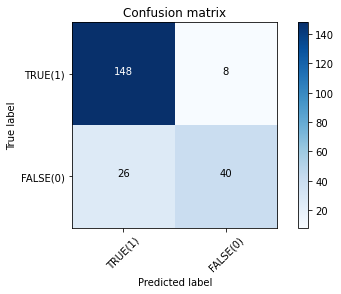

In [677]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['TRUE(1)','FALSE(0)'],normalize= False,  title='Confusion matrix')

# Naive Bayes Classifier

### Load the historical dataset of the online computer store.

In [678]:
df_nb=pd.read_csv("CE802_ASS_2018_RESIT.csv")
df_nb.head(10)

,F1,F2,F3,F4,F5,F6,F7,F8,C
0,1,0.73,14,2.49,2,0.89,1,0.60,True
1,3,0.65,15,1.51,9,0.91,1,0.68,True
2,-10,0.21,39,1.67,5,0.10,1,0.58,True
3,-12,1.45,20,-1.54,9,0.70,1,0.27,True
4,13,0.03,41,2.21,9,0.39,1,1.03,False
5,-16,0.64,10,0.61,7,0.91,1,0.39,False
6,8,0.37,16,1.23,10,0.44,1,0.12,True
7,-19,1.53,16,-1.61,2,0.09,1,0.40,False
8,15,1.81,9,-3.04,3,0.42,1,0.39,False
9,0,0.41,12,2.12,14,0.92,1,0.04,False


### Separate the data into features and targets.

In [679]:
X = dt.drop('C', axis=1)
y = dt['C']

### Standardize the data

In [680]:
scale=StandardScaler()
X= scale.fit_transform(X)
X

array([[ 0.06, -0.44, -0.8 , ...,  1.35,  0.16,  0.39],
       [ 0.24, -0.58, -0.76, ...,  1.42,  0.16,  0.67],
       [-0.9 , -1.37,  0.33, ..., -1.34,  0.16,  0.33],
       ...,
       [-0.9 ,  1.36, -1.26, ...,  0.74,  0.16,  0.43],
       [-1.6 ,  0.63,  1.56, ..., -0.8 ,  0.16, -0.44],
       [ 1.28, -1.14, -0.39, ...,  1.31,  0.16, -1.58]])

### Over-sampling and under-sampling on unbalanced data

0.7.0
Class=0, n=252 (34.054%)
Class=1, n=488 (65.946%)


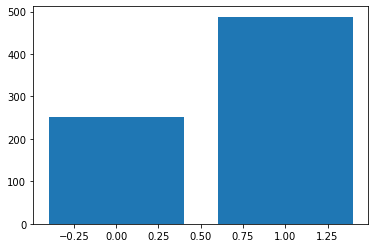

In [681]:
print(imblearn.__version__)

oversample = SMOTE()
enn = EditedNearestNeighbours()
# label encode the target variable

y = LabelEncoder().fit_transform(y)

X, y = enn.fit_resample(X, y)
# summarize distribution
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100

    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
#plot the distribution
plt.bar(counter.keys(), counter.values())
plt.show()

### Train Test Split divides the dataset into 80 percent for training and 20 percent for testing.

In [682]:
x_train, x_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=50)
print ('Train set:', x_train.shape,  y_train.shape)
print ('Test set:', x_test.shape,  y_test.shape)

Train set: (592, 8) (592,)
Test set: (148, 8) (148,)



### To build the model, I use the Naive Bayes classifier.

In [683]:
cv_method = RepeatedStratifiedKFold(n_splits=5,  n_repeats=3, random_state=999)

In [684]:
nb=GaussianNB()

### Grid search cross validation hyperparameter tuning will be utilised to increase the performance accuracy of our model.

In [685]:
param_grid_nb = {
    'var_smoothing': np.logspace(0,-9, num=100)
}

In [686]:
nbModel_grid = GridSearchCV(estimator=nb, param_grid=param_grid_nb, verbose=1, cv=cv_method, n_jobs=-1)
nbModel_grid.fit(x_train, y_train)
print(nbModel_grid.best_estimator_)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
GaussianNB(var_smoothing=1.0)


### This will produce the best parameters, estimator, and score for our NB classifier.

In [687]:
print('Best parameter:', nbModel_grid.best_params_)
print('Best grid estimator:', nbModel_grid.best_estimator_)
print('Best score', nbModel_grid.best_score_)

Best parameter: {'var_smoothing': 1.0}
Best grid estimator: GaussianNB(var_smoothing=1.0)
Best score 0.7021696814318948


### I will now, apply the above-mentioned parameters for the Naive Bayes classifier

In [688]:
nb=GaussianNB(var_smoothing=1.0).fit(x_train,y_train)
nb

GaussianNB(var_smoothing=1.0)

### I will apply the predict method to the test set.

In [689]:
y_pred = nb.predict(x_test)

### I used cross validation to further analyze the model's performance on its test set.

In [690]:
print(classification_report(y_test, y_pred))

print('Accuracy of Naive Bayes classifier on the training set: {:.2f}'.format(nb.score(x_train, y_train)))
print('Accuracy of Naive Bayes classifier on the test set: {:.2f}'.format(nb.score(x_test, y_test)))

#Decision Trees are very prone to overfitting as shown in the scores

score = cross_val_score(nb, x_train, y_train, cv=10) 
print('Cross-validation score: ',score)
print('Cross-validation mean score: ',score.mean())

              precision    recall  f1-score   support

           0       0.55      0.52      0.54        42
           1       0.81      0.83      0.82       106

    accuracy                           0.74       148
   macro avg       0.68      0.68      0.68       148
weighted avg       0.74      0.74      0.74       148

Accuracy of Naive Bayes classifier on the training set: 0.71
Accuracy of Naive Bayes classifier on the test set: 0.74
Cross-validation score:  [0.67 0.73 0.69 0.66 0.69 0.64 0.75 0.81 0.69 0.75]
Cross-validation mean score:  0.7094915254237288


### Summarize the model's performance using different classification metrics.

In [691]:
def summarize_classification(y_test,y_pred,avg_method='weighted'):
    acc = accuracy_score(y_test, y_pred,normalize=True)
    num_acc = accuracy_score(y_test, y_pred,normalize=False)
    f1= f1_score(y_test, y_pred, average=avg_method)
    prec = precision_score(y_test, y_pred, average=avg_method)
    recall = recall_score(y_test, y_pred, average=avg_method)
    jaccard = jaccard_score(y_test, y_pred, average=avg_method)
    
    print("Length of testing data: ", len(y_test))
    print("accuracy_count : " , num_acc)
    print("accuracy_score : " , acc)
    print("f1_score : " , f1)
    print("precision_score : " , prec)
    print("recall_score : ", recall)
    print("jaccard_score : ", jaccard)
    
summarize_classification(y_test, y_pred)

Length of testing data:  148
accuracy_count :  110
accuracy_score :  0.7432432432432432
f1_score :  0.741311861211565
precision_score :  0.7396646646646647
recall_score :  0.7432432432432432
jaccard_score :  0.6042685542685543


### In y_pred, save the model's anticipated result.

In [692]:
#Accuracy
pred_results = pd.DataFrame({'y_test': pd.Series(y_test),
                             'y_pred': pd.Series(y_pred)})

pred_results.sample(10)

,y_test,y_pred
50,0,1
32,0,0
9,1,1
8,1,1
29,1,1
28,1,1
94,1,0
52,1,1
36,1,1
126,1,1


### To further evaluate our performance findings, let's build a confusion matrix that describes the false positive, true negative, true positive, and false negative.

In [693]:
def ConfusionMatrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
print(confusion_matrix(y_test, y_pred, labels=[1,0]))

[[88 18]
 [20 22]]


              precision    recall  f1-score   support

           0       0.55      0.52      0.54        42
           1       0.81      0.83      0.82       106

    accuracy                           0.74       148
   macro avg       0.68      0.68      0.68       148
weighted avg       0.74      0.74      0.74       148

Confusion matrix, without normalization
[[88 18]
 [20 22]]


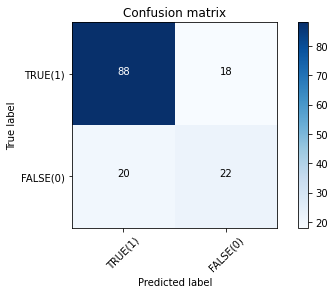

In [694]:
cnf_matrix = confusion_matrix(y_test, y_pred, labels=[1,0])
np.set_printoptions(precision=2)

print (classification_report(y_test, y_pred))

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['TRUE(1)','FALSE(0)'],normalize= False,  title='Confusion matrix')

In [695]:
result=[{ 'Accuracy Score':0.79,
         'F1 Score': 0.80,
         'Precision Score': 0.81,
         'Recall Score': 0.79,
         'Jaccard Score': 0.67},
        {'Accuracy Score':0.92,
         'F1 Score': 0.92,
         'Precision Score': 0.92,
         'Recall Score': 0.92,
         'Jaccard Score': 0.85},
        {'Accuracy Score': 0.84,
         'F1 Score': 0.83,
         'Precision Score': 0.84,
         'Recall Score': 0.84,
         'Jaccard Score': 0.73},
        {'Accuracy Score': 0.74,
         'F1 Score': 0.74,
         'Precision Score': 0.73,
         'Recall Score': 0.74,
         'Jaccard Score': 0.60}]
df=pd.DataFrame(result, index=['Decision Tree', 'Support Vector Machine','Random Forest', 'Naive Bayes'])
df.head()

,Accuracy Score,F1 Score,Precision Score,Recall Score,Jaccard Score
Decision Tree,0.79,0.80,0.81,0.79,0.67
Support Vector Machine,0.92,0.92,0.92,0.92,0.85
Random Forest,0.84,0.83,0.84,0.84,0.73
Naive Bayes,0.74,0.74,0.73,0.74,0.60
